# <u> COGS 118B Assignment 1 </u>

In this Assignment we will be implementing **K-means clustering** on 2D points. The algorithm is to divide the given set of points into **k** clusters (groups), such that all points in a cluster are "close together". The number **k** is chosen in advance manually and is not computed by the algorithms.

***In this assignment, please complete the code only in the cells which mention that you should do so in the code comments.***

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

<b><u>Use Cases:</u></b>
- Document Classification
- Delivery Store Optimization
- Customer Segmentation
- Insurance Fraud Detection etc.

### <u> Algorithm </u>:

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

<b><u>1. Data assigment step:</u></b>

Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. If $c_i$ is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance.

<b><u>2. Centroid update step:</u></b>

Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between step one and two until a stopping criteria is met (cluster centers stops changing, the sum of the distances is minimized, or some maximum number of iterations is reached). In this assignment, we will use the first criterion, i.e. that no cluster centers change.

<b>This algorithm may converge on a local optimum. </b> Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

### Generating the data

We will generate 3 datasets to use in this assignment. They are created in the following code, and stored in `X1`, `X2` and `X3` respectively. They are each set of 500 2D points. We store them as matrices of size $500 \times 2$.

Please use these variables `X1`, `X2` and `X3` to run your kmeans in this assignment.

X1 shape:  (500, 2)


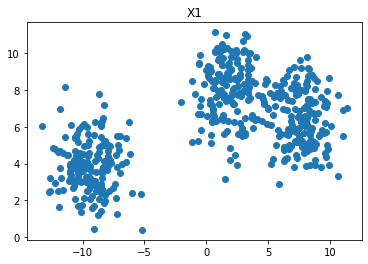

X2 shape:  (500, 2)


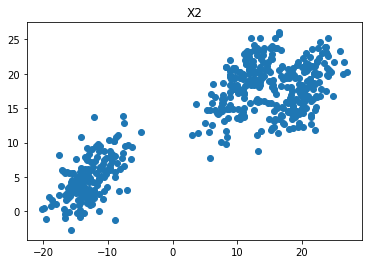

X3 shape:  (500, 2)


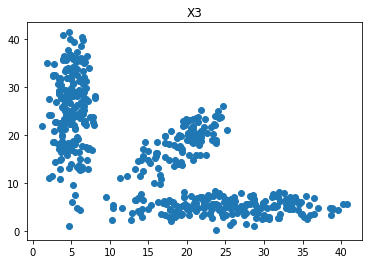

In [2]:
"""
This cell has been completed for you. You don't need to change it.
"""

X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
X1 = np.dot(X,np.random.RandomState(0).randn(2,2))

print('X1 shape: ', X1.shape)

plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.title('X1')
plt.show()

centers = [[4, 7], [9, 9], [9, 2]]

X2,Y2 = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=centers)
X2 = np.dot(X1,np.random.RandomState(0).randn(2,2))

print('X2 shape: ', X2.shape)

plt.scatter([x[0] for x in X1], [x[1] for x in X1])
plt.title('X2')
plt.show()

centers = [[5, 5]]
X31,Y31 = make_blobs(cluster_std=1.5,random_state=20,n_samples=200,centers=centers)
X31 = np.dot(X31, np.array([[1.0, 0], [0, 5.0]]))

centers = [[5, 5]]
X32,Y32 = make_blobs(cluster_std=1.5,random_state=20,n_samples=200,centers=centers)
X32 = np.dot(X32, np.array([[5.0, 0], [0, 1.0]]))

centers = [[7, 7]]
X33, Y33 = make_blobs(cluster_std=1.5,random_state=20,n_samples=100,centers=centers)
X33 = np.dot(X33, np.random.RandomState(0).randn(2,2))

X3 = np.vstack((X31, X32, X33))

print('X3 shape: ', X3.shape)

plt.scatter([x[0] for x in X3], [x[1] for x in X3])
plt.title('X3')
plt.show()

### KMeans Algorithm Class

Now we will start coding the K-means algorithm. All the code will be in the `KmeansModel` class.

We start by initializing the class. To initialize, we specify the data matrix **X** and the number of clusters **k**. **X** is a matrix of shape $N \times 2$, as we have **N** points each with x and y coordinates. We set `self.N` as the number of points and `self.dim` as the number of dimensions (2).

We need to store $k$ centroids, one for each cluster. We shall store them as a $K \times 2$ matrix in `self.centroids`. We initialize the centroids to be random points from our dataset.

If the model is not converging, we stop running it if the number of iterations has reached `max_iters`.

Finally we plot the data with the initial (random) clustering.

**To-do** (2 points)

1.1 Initialize centroids. (1 point)

1.2 Find the initial labels using the initial centroids. (You will have to write the `get_labels` method first before completing this part.) (1 point)

In [3]:
class KmeansModel:
    
    def __init__(self, X, k, max_iters):
        self.X = X
        self.k = k
        self.max_iters = max_iters
        
        self.dim = X.shape[1]
        self.N = X.shape[0]
        
        
        self.centroids = np.zeros((self.k, self.dim))
        initial_labels = np.zeros((self.N))           
        #YOUR CODE HERE
        self.centroids = X[np.random.choice(self.N, k, replace=False)]
        initial_labels = self.get_labels(self.X, self.centroids)
        
        self.plot_data(initial_labels, 'Data with initial random clusters')

To color each point according to its cluster, we need to specify a **label** for each point. A label is just an integer `between 0 and k-1`, which corresponds to the index of the cluster that the datapoint belongs to. The label for all points in the same cluster must be the same.

So we make a function `get_labels(X, centroids)`. This function takes in our $N \times 2$ data matrix **X**, and our $k \times 2$ centroid matrix. It should return a $N \times 1$ numpy array (or a length $N$ numpy vector) `labels`, such that `labels[i]` is the index of the cluster of the `i`'th point.

To do this, we should iterate over all the points. For each point we should iterate over all the centroids, and choose the one which is the closest (least Euclidean distance) to the point. We can simply use the index of that centroid (`0 <= index < k`) as the label for that point. Finally, we return the array of labels for all the points.

**To-do** (3 points)

1.3 Complete method `get_label`.


In [4]:
def get_labels(self, X, centroids):
    labels = []
    #YOUR CODE HERE
    for i in X:
        distance = np.sqrt(np.sum((i-centroids)**2, axis = 1))
        labels.append(np.argmin(distance))
    
    return np.array(labels)

KmeansModel.get_labels = get_labels # We define this function to be a function of the KmeansModel class.

Here we have a function to plot our data. This function takes in the labels, and colors each point according to its cluster, as defined by the labels we computed above.

In [5]:
def plot_data(self, labels, title):
    fig = plt.figure(figsize=(7,7))
    ax0 = fig.add_subplot(111)
    ax0.scatter(self.X[:,0], self.X[:,1], c=labels)
    ax0.set_title(title)
    
KmeansModel.plot_data = plot_data

Now we have our main function which runs the K-means algorithm. This repeatedly performs the two steps of the Kmeans algorithm (Data Assignment and Centroid Update). You should stop when there is no change in the cluster centroids, ie. they are the same as the previous step.

We also stop after a certain number of max iterations if the algorithm is not converging.

After convergence, we plot the data again with the new cluster centers and labels.

**To-do** (5 points)

1.4 Complete the while loop inside the `run` method and find the final predicted labels. Make sure include the two types of stopping mechanism. (3 points)

1.5 Run the `KmeansModel` and plot the labeled clusters. (2 points)

In [6]:
def run(self):
    iters = 0
    prev = np.copy(self.centroids)
    while True:
        ### Your code here ###
        label = self.get_labels(self.X, self.centroids)
        
        for i in range(self.k):
            cluster = self.X[label == i]
            if len(cluster) > 0:
                self.centroids[i] = np.mean(cluster, axis=0)
        if iters >= self.max_iters or np.all(prev == self.centroids):
            break
        
        prev = np.copy(self.centroids)
        iters += 1

    
    final_labels = label # Change this line 
    ###
    final_labels = self.get_labels(self.X, self.centroids)
    ###
    self.plot_data(final_labels, 'Final clusters')
    
KmeansModel.run = run

Finally, we create an instance of `KmeansModel` and run our algorithm on some data.

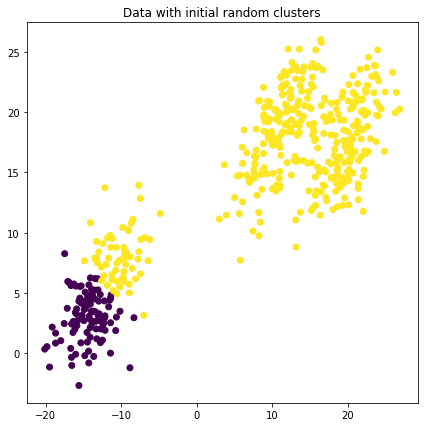

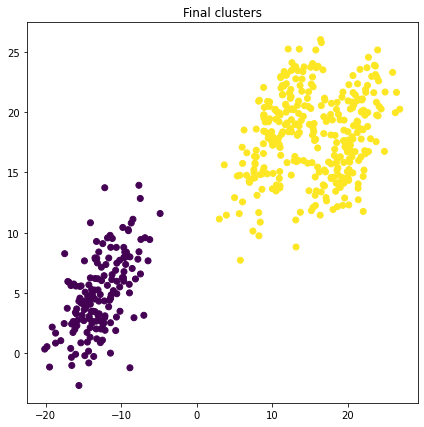

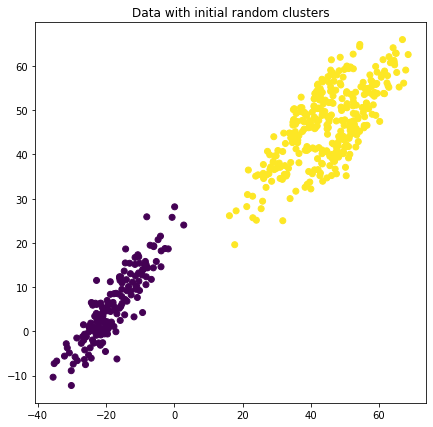

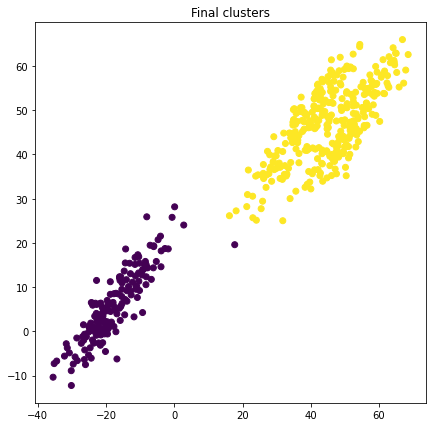

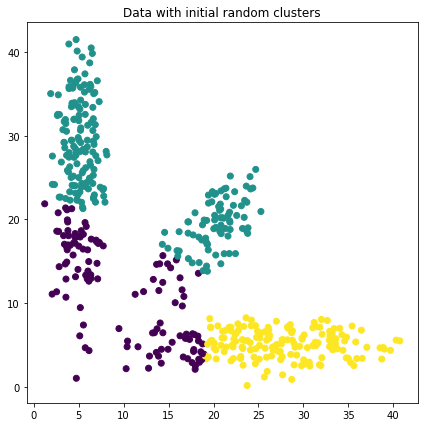

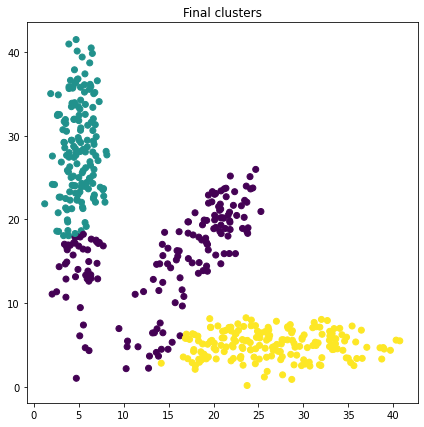

In [22]:
#### Feel free to modify the code below
km1 = KmeansModel(X1, 2, 10)
km1.run()

km2 = KmeansModel(X2, 2, 100)
km2.run()

km3 = KmeansModel(X3, 3, 100)
km3.run()

# PART 2 - PCA

PCA is a technique used to reduce the dimensions of a dataset that has a large number of features. This is possible by finding the principle components (or principle axes) of a dataset. We sort the principle components by the size of their corresponding eiganvalues. PC1 is the principle component with the largest eigenvalue and data has the largest variance across its axis. PC2 has the next highest eigenvalue and so on . To reduce the dimensions of the dataset, we map the dataset onto the first n principle components. We can decide the the value of n based on the amount of information we want to keep. The lower the n, the less information the transformed data contains.

<b><u>Use Cases:</u></b>
- Visualizing clustering results for K-mean.
- Improving prediction speed for KNN algorithm. 
- Data compression. 

### Task:
Given the following matrix of 6 points in 7 dimensions. Project these 6 points on to two pricinple components (2-dimensions). You may use Numpy built-in methods or any other tool to compute steps like covariance matrix, eigenvectors, eigenvalues etc.

$$\begin{bmatrix} 13.77 & 1.9 & 2.68 & 17.1 &115 &3.0 &12.79 \\
13.74 & 1.67 & 2.25 & 16.4 & 118 & 2.6 & 15.9 \\
13.56 &	1.73 & 2.46 & 20.5 & 116 & 2.96 & 10.78\\
14.22 &	1.70 & 2.30	& 16.3 & 118 & 3.2 & 9.03\\
13.29 &	1.97 & 2.68	& 16.8 & 113 & 3.9 & 12.23 \\
13.72 &	1.43 & 2.50	& 16.7 & 117 & 3.4 & 13.80 \end{bmatrix}$$


**Steps to do:**
1. Substract the column mean of the points from each point.
2. Divide each point by the column standard deviation of the points. 
3. Take the covariance matrix of the resulting data.
4. Get eigenvectors of the covariance matrix.
5. Get corresponding eigenvalues.
6. Sort the eigenvalues in ascending order.
7. Pick the two eigenvectors with the largest eigenvalues.
8. Project the data down on the selected two eigenvectors. 

**What to print:** (8 points)
1.	Data after subtracting the mean and dividing by standard deviation.
2.	Covariance matrix.
3.	Eigenvectors and corresponding eigenvalues.
4.	Final projected data in two dimensions.


1. Print the data after subtracting the mean and dividing by standard deviation. The output should be a 2D numpy ndarray. (2 points)

In [18]:
### Your code here ###
matrix = np.array([[13.77,13.74,13.56,14.22,13.29,13.72],
                   [1.9,1.67,1.73,1.70,1.97,1.43],
                   [2.68,2.25,2.46,2.30,2.68,2.50],
                   [17.1, 16.4, 20.5, 16.3, 16.8, 16.7],
                   [115,118,116,118,113,117],
                   [3.0,2.6,2.96,3.2,3.9,3.4],
                   [12.79,15.9,10.78,9.03,12.23,13.80]])

matrix_mean = np.mean(matrix, axis=1, keepdims=True)
matrix_std = np.std(matrix, axis=1, keepdims=True)

matrix2 = (matrix-matrix_mean)/matrix_std
matrix2

array([[ 0.19192325,  0.08396642, -0.56377454,  1.81127563, -1.53538597,
         0.0119952 ],
       [ 0.95976539, -0.36471085, -0.01919531, -0.19195308,  1.36286685,
        -1.746773  ],
       [ 1.21212307, -1.37240381, -0.11019301, -1.07187743,  1.21212307,
         0.1302281 ],
       [-0.13746868, -0.61860906,  2.19949887, -0.6873434 , -0.3436717 ,
        -0.41240604],
       [-0.65850461,  1.03479296, -0.09407209,  1.03479296, -1.78736965,
         0.47036043],
       [-0.43617337, -1.42373571, -0.5349296 ,  0.0576078 ,  1.7858419 ,
         0.55138897],
       [ 0.16939124,  1.59963578, -0.75497904, -1.55977902, -0.08814476,
         0.6338758 ]])

2. Print the covariance matrix. The output should be a 2D numpy ndarray. (2 points)

In [19]:
### Your code here ###
matrix3 = np.cov(matrix2)
matrix3

array([[ 1.2       , -0.45935196, -0.72429147, -0.40811876,  0.92755612,
        -0.50653541, -0.41795726],
       [-0.45935196,  1.2       ,  0.65924662,  0.08707887, -0.89275917,
         0.31411025, -0.26685979],
       [-0.72429147,  0.65924662,  1.2       ,  0.14129034, -1.08448108,
         0.7317816 , -0.05184635],
       [-0.40811876,  0.08707887,  0.14129034,  1.2       , -0.20949784,
        -0.22332338, -0.36648565],
       [ 0.92755612, -0.89275917, -1.08448108, -0.20949784,  1.2       ,
        -0.80174469,  0.09128368],
       [-0.50653541,  0.31411025,  0.7317816 , -0.22332338, -0.80174469,
         1.2       , -0.36904756],
       [-0.41795726, -0.26685979, -0.05184635, -0.36648565,  0.09128368,
        -0.36904756,  1.2       ]])

3.1. Print all eigenvectors (sorted by eigenvalues in ascending order). The output should be a 2D numpy ndarray, each row is an eigen vector. (1 points)

In [33]:
### Your code here ###
eigenvalues, eigenvectors = np.linalg.eig(matrix3)
sort = np.argsort(eigenvalues)
sort_eigenvectors = eigenvectors[:,sort]
sort_eigenvectors

array([[-0.12996687, -0.51424137, -0.43889955,  0.21835181,  0.33084812,
        -0.3634212 ,  0.4172309 ],
       [ 0.33917674,  0.10522963,  0.27594636,  0.78172592,  0.01692511,
        -0.15766721, -0.38334801],
       [ 0.29824044,  0.33517044, -0.79700184, -0.03969055,  0.06521047,
         0.04703981, -0.48385925],
       [ 0.12308608, -0.21996443, -0.05509595, -0.21978446, -0.80502135,
        -0.33328611, -0.1091245 ],
       [ 0.82198133,  0.67577294,  0.02390879, -0.07234695, -0.0040902 ,
        -0.02919739,  0.53596274],
       [ 0.27848199, -0.13070837,  0.29448645, -0.52827093,  0.47428393,
        -0.10990418, -0.37673881],
       [ 0.10375301, -0.3000087 , -0.07536182,  0.08391819, -0.11392672,
         0.84666539,  0.06120912]])

3.2. Print all eigenvalues (in ascending order). The output should be a 1D numpy ndarray. (1 points)

In [34]:
### Your code here ###
sort_eigenvalues = eigenvalues[sort]
sort_eigenvalues

array([-1.21156151e-16,  1.17808458e-16,  3.39899403e-01,  8.55446920e-01,
        1.43309592e+00,  1.61524069e+00,  4.15631707e+00])

4. Print the final projected data in two dimensions. The output should be a 2D numpy ndarray. (2 points)

In [44]:
### Your code here ###
sort_desc = np.argsort(eigenvalues)[::-1]
first2_eigenvalues = eigenvalues[sort_desc][:2]
first2_eigenvectors = eigenvectors[:, sort_desc][:,:2]
final_matrix = np.dot(first2_eigenvectors.T, matrix2)
final_matrix

array([[-1.03758582,  2.09529952, -0.30966898,  1.86038347, -3.34821148,
         0.73978329],
       [ 0.09234351,  1.64922147, -1.10800876, -1.80648567,  0.29595736,
         0.87697209]])